In [1]:
import pandas as pd
import numpy as np
import os


target_path = 'TKY'

codebook = pd.read_csv(f'../code/data/{target_path}/codebooks.csv')
poi_info = pd.read_csv(f'../code/data/{target_path}/poi_infos.csv')
# 合并数据，将 `cat_id` 和 `region_id` 插入到 `codebook`
codebook = codebook.merge(poi_info[['poi_id', 'cat_id', 'catname', 'region_id']], on='poi_id', how='left')
codebook['codebook'] = codebook['codebook'].apply(eval)

# print(codebook.head())

# 保留以 [0, *, *], [1, *, *], ..., 开头的 codebook 数据
filtered_df = codebook[codebook['codebook'].apply(lambda x: x[0] == 1)]
# print(len(filtered_df))
# print(len(filtered_df['cat_id'].unique()))
# 统计每个 cat_id 对应的个数
# group_1 = filtered_df['cat_id'].value_counts().head(5)
group_1 = filtered_df['catname'].value_counts().head(5)
group_1 = group_1.to_dict()
# print(group_1.head(50))
# print(len(filtered_df))
print(group_1)

filtered_df = codebook[codebook['codebook'].apply(lambda x: x[0] == 9)]
# print(len(filtered_df))
# print(len(filtered_df['cat_id'].unique()))
# 统计每个 cat_id 对应的个数
# group_2 = filtered_df['cat_id'].value_counts().head(5)
group_2 = filtered_df['catname'].value_counts().head(5)
group_2 = group_2.to_dict()
# print(group_2.head(50))
# print(len(filtered_df))
print(group_2)

filtered_df = codebook[codebook['codebook'].apply(lambda x: x[0] == 15)]
# print(len(filtered_df))
# print(len(filtered_df['cat_id'].unique()))
# 统计每个 cat_id 对应的个数
# group_3 = filtered_df['cat_id'].value_counts().head(5)
group_3 = filtered_df['catname'].value_counts().head(5)
group_3 = group_3.to_dict()
# print(group_2.head(50))
# print(len(filtered_df))
print(group_3)

filtered_df = codebook[codebook['codebook'].apply(lambda x: x[0] == 25)]   # 1 6 9 15 25 30
# 统计每个 cat_id 对应的个数
# group_4 = filtered_df['cat_id'].value_counts().head(5)
group_4 = filtered_df['catname'].value_counts().head(5)
group_4 = group_4.to_dict()
print(group_4)


{'Train Station': 28, 'Ramen /  Noodle House': 19, 'Fast Food Restaurant': 10, 'Mall': 9, 'Food & Drink Shop': 7}
{'College Academic Building': 41, 'University': 15, 'Coffee Shop': 5, 'Concert Hall': 5, 'Subway': 4}
{'Home (private)': 23, 'Road': 20, 'Government Building': 14, 'Bridge': 12, 'Convenience Store': 11}
{'College Academic Building': 28, 'University': 2, 'Fast Food Restaurant': 1, 'Dumpling Restaurant': 1, 'Student Center': 1}


['College Academic Building', 'University', 'Fast Food Restaurant', 'Dumpling Restaurant', 'Student Center', 'Train Station', 'Ramen /  Noodle House', 'Mall', 'Food & Drink Shop', 'Coffee Shop', 'Concert Hall', 'Subway', 'Home (private)', 'Road', 'Government Building', 'Bridge', 'Convenience Store']


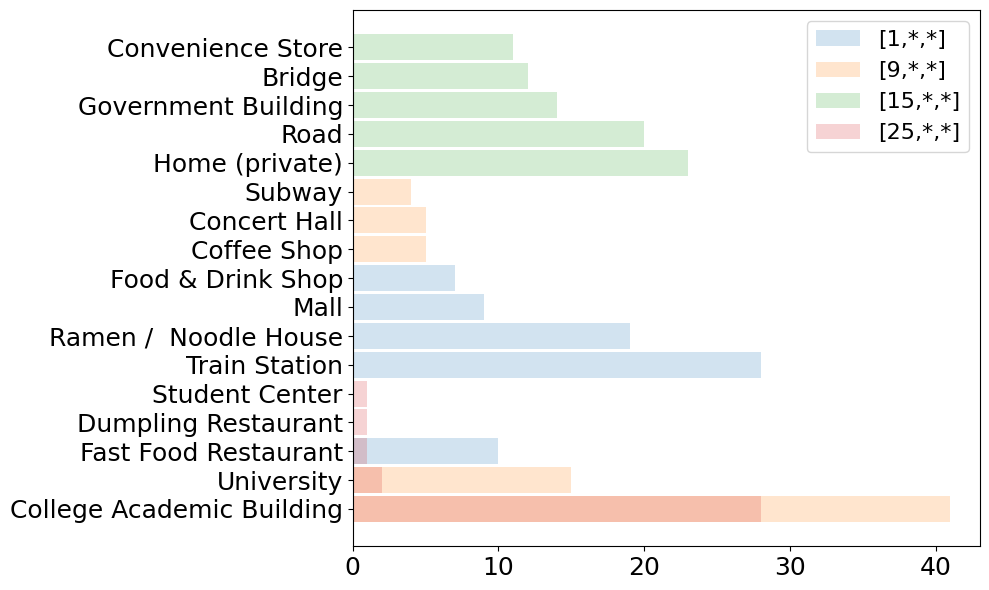

In [2]:
import matplotlib.pyplot as plt

# 合并所有的key
all_keys = []
for group in [group_4, group_1, group_2, group_3]:
    for key in group.keys():
        if key not in all_keys:
            all_keys.append(key)
print(all_keys)
# all_keys = sorted(set(group_1.keys()).union(set(group_2.keys())).union(set(group_3.keys()).union(set(group_4.keys()))))
# all_keys = sorted(set(group_1.keys()).union(set(group_2.keys())).union(set(group_3.keys())))

# 获取每个key在各组中的value（若某key不在某组中，视为0）

group_1_values = [group_1.get(key, 0) for key in all_keys]
group_2_values = [group_2.get(key, 0) for key in all_keys]
group_3_values = [group_3.get(key, 0) for key in all_keys]
group_4_values = [group_4.get(key, 0) for key in all_keys]

# 设置条形图位置
x = np.arange(len(all_keys))

# 设置条形图宽度
bar_width = 0.9
alpha = 0.2
# 绘制条形图
fig, ax = plt.subplots(figsize=(10, 6))

# 绘制每一组的条形图
rects1 = ax.barh(x, group_1_values, bar_width, label='[1,*,*]', alpha=alpha)
rects2 = ax.barh(x, group_2_values, bar_width, label='[9,*,*]', alpha=alpha)
rects3 = ax.barh(x, group_3_values, bar_width, label='[15,*,*]', alpha=alpha)
rects4 = ax.barh(x, group_4_values, bar_width, label='[25,*,*]', alpha=alpha)

# 添加标签和标题
# ax.set_ylabel('Catname', fontsize=24)
# ax.set_xlabel('Frequency Count', fontsize=24)

ax.set_yticks(x)
ax.set_yticklabels(all_keys, fontsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.tick_params(axis='x', labelsize=18)
ax.legend(fontsize=16)

# 显示图形
# plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig(f'../code/data/{target_path}/semitic_bar.png', dpi=600)
plt.show()






420
217


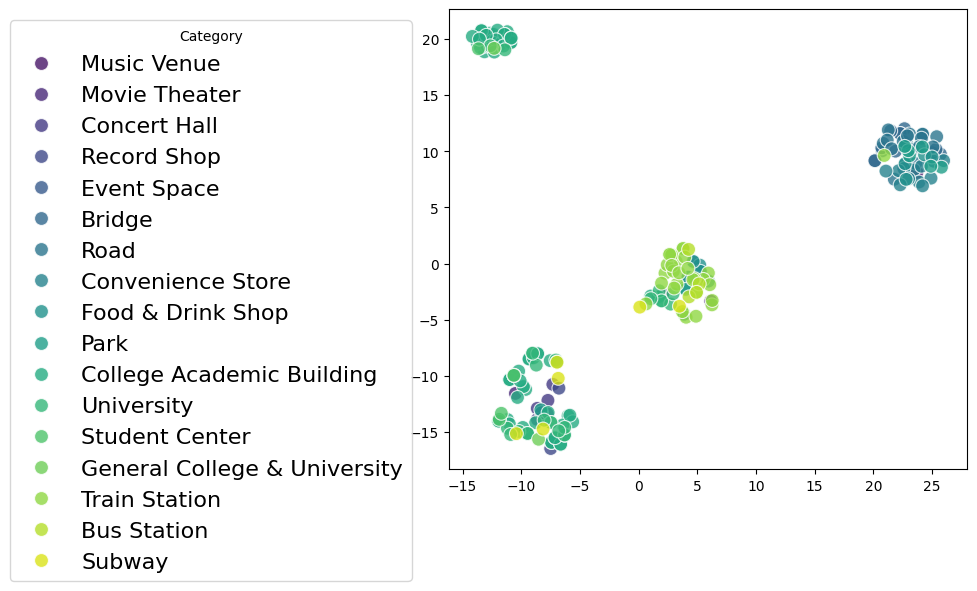

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

target_path = 'TKY'

codebook = pd.read_csv(f'../code/data/{target_path}/codebooks.csv')
poi_info = pd.read_csv(f'../code/data/{target_path}/poi_infos.csv')
# 合并数据，将 `cat_id` 和 `region_id` 插入到 `codebook`
codebook = codebook.merge(poi_info[['poi_id', 'catname']], on='poi_id', how='left')
codebook['codebook'] = codebook['codebook'].apply(eval)
codebook['vector'] = codebook['vector'].apply(eval)
filtered_df = codebook[codebook['codebook'].apply(lambda x: x[0] == 1 or x[0] == 9 or x[0] == 15 or x[0] == 25)] 
print(len(filtered_df))

all_keys = ['Music Venue', 'Movie Theater', 'Concert Hall', 'Record Shop', 'Event Space', 'Bridge', 'Road', 'Convenience Store', 'Food & Drink Shop', 'Park', 'College Academic Building', 'University', 'Student Center', 'General College & University', 'Train Station', 'Bus Station', 'Subway']

filtered_df = filtered_df[['catname', 'vector']]
filtered_df = filtered_df[filtered_df['catname'].isin(all_keys)]
print(len(filtered_df))

# 将 `vector` 列转化为numpy数组，便于t-SNE处理
vectors = np.array(filtered_df['vector'].to_list())

# 使用t-SNE进行降维到2维
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(vectors)

# 将降维后的结果添加到DataFrame中
filtered_df['tsne_1'] = tsne_results[:, 0]
filtered_df['tsne_2'] = tsne_results[:, 1]

# 颜色按照类别排序逐渐变化
# 将类别映射到指定顺序并生成颜色
sorted_df = filtered_df[filtered_df['catname'].isin(all_keys)].copy()
sorted_df['catname'] = pd.Categorical(sorted_df['catname'], categories=all_keys, ordered=True)
sorted_df.sort_values('catname', inplace=True)

# 使用渐变调色板
num_categories = len(all_keys)
palette = sns.color_palette("viridis", num_categories)  # 你可以改为 "plasma", "coolwarm" 等渐变调色板

# 绘制 t-SNE 可视化
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=sorted_df,
    x='tsne_1',
    y='tsne_2',
    hue='catname',
    palette=palette,
    s=100,
    alpha=0.8
)
# plt.title('t-SNE Visualization with Gradual Color Transition', fontsize=16)
plt.xlabel('') # 显示设置为空字符串 t-SNE 1
plt.ylabel('') # t-SNE 2
plt.legend(title='Category', bbox_to_anchor=(-0.05, 1), loc='upper right', fontsize=1) #（1.05, 1）
ax.tick_params(axis='y', labelsize=14)  
ax.tick_params(axis='x', labelsize=14)
plt.tight_layout()
plt.savefig(f'../code/data/{target_path}/semitic_tsne.png', dpi=600)
plt.show()


In [11]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

target_path = 'TKY'

codebook = pd.read_csv(f'../code/data/{target_path}/codebooks.csv')
poi_info = pd.read_csv(f'../code/data/{target_path}/poi_infos.csv')
# 合并数据，将 `cat_id` 和 `region_id` 插入到 `codebook`
codebook = codebook.merge(poi_info[['poi_id', 'cat_id', 'region_id']], on='poi_id', how='left')
codebook['codebook'] = codebook['codebook'].apply(eval)
# print(codebook.head())

# 保留以 [0, *, *], [1, *, *], ..., 开头的 codebook 数据
filtered_df = codebook[codebook['codebook'].apply(lambda x: x[0] == 0 and x[1] == 0)] 
# print(len(filtered_df))
group_1 = filtered_df['cat_id'].value_counts()
group_1 = group_1.to_dict()
print(group_1)

# filtered_df = codebook[codebook['codebook'].apply(lambda x: x[0] == 10)]
# # print(len(filtered_df))
# group_2 = filtered_df['cat_id'].value_counts().head(5)
# group_2 = group_2.to_dict()
# print(group_2)

# filtered_df = codebook[codebook['codebook'].apply(lambda x: x[0] == 20)]
# # print(len(filtered_df))
# group_3 = filtered_df['cat_id'].value_counts().head(5)
# group_3 = group_3.to_dict()
# print(group_3)

# filtered_df = codebook[codebook['codebook'].apply(lambda x: x[0] == 30)]
# # 统计每个 cat_id 对应的个数
# group_4 = filtered_df['cat_id'].value_counts().head(5)
# group_4 = group_4.to_dict()
# print(group_4)



# # 合并所有的key
# all_keys = sorted(set(group_1.keys()).union(set(group_2.keys())).union(set(group_3.keys()).union(set(group_4.keys()))))
# # all_keys = sorted(set(group_1.keys()).union(set(group_2.keys())).union(set(group_3.keys())))

# # 获取每个key在各组中的value（若某key不在某组中，视为0）
# group_1_values = [group_1.get(key, 0) for key in all_keys]
# group_2_values = [group_2.get(key, 0) for key in all_keys]
# group_3_values = [group_3.get(key, 0) for key in all_keys]
# group_4_values = [group_4.get(key, 0) for key in all_keys]

# # 设置条形图位置
# x = np.arange(len(all_keys))

# # 设置条形图宽度
# bar_width = 0.8
# alpha = 0.2
# # 绘制条形图
# fig, ax = plt.subplots(figsize=(16, 10))

# # 绘制每一组的条形图
# rects1 = ax.bar(x, group_1_values, bar_width, label='[0,*,*]', alpha=alpha)
# rects2 = ax.bar(x, group_2_values, bar_width, label='[10,*,*]', alpha=alpha)
# rects3 = ax.bar(x, group_3_values, bar_width, label='[20,*,*]', alpha=alpha)
# rects4 = ax.bar(x, group_4_values, bar_width, label='[30,*,*]', alpha=alpha)

# # 添加标签和标题
# ax.set_xlabel('Category ID', fontsize=30)
# ax.set_ylabel('Frequency Count', fontsize=30)
# ax.set_xticks(x)
# ax.set_xticklabels(all_keys, fontsize=22)
# ax.tick_params(axis='y', labelsize=22)
# ax.legend(fontsize=24)

# # 显示图形
# plt.xticks(rotation=0)
# plt.tight_layout()
# # plt.savefig(f'../code/data/{target_path}/SID_Frequency2.png', dpi=300)
# plt.show()

{90: 2, 157: 1}


In [12]:
import pandas as pd
import numpy as np
import os


target_path = 'NYC'
div_loss = 0.5
codebook = pd.read_csv(f'../code/data/{target_path}/codebooks_{div_loss}.csv')
code_list = codebook['codebook'].apply(eval).tolist()
print(len(code_list))
print()

count = 0
unique = 0
max = 0
for code in code_list:
    if len(code) == 4:
        if code[-1] > max:
            max = code[-1]
        if code[-1] == 0:
            count += 1
    else:
        unique += 1
print(count)
print(max)
print(unique)
print()

codebook2 = pd.read_csv(f'../code/data/{target_path}/codebooks_old.csv')
code_list2 = codebook2['codebook'].apply(eval).tolist()
count2 = 0
unique2 = 0
max2 = 0
for code in code_list2:
    if len(code) == 4:
        if code[-1] > max2:
            max2 = code[-1]
        if code[-1] == 0:
            count2 += 1
    else:
        unique2 += 1
print(count2)
print(max2)
print(unique2)

4638

606
5
3267

577
14
3278
